**NOTA BENE** 

Se volete  modificare la classe, fatte un altro file GBMObservation.py

## Importing libraries and creating the fundamental folders

In [1]:
import os
import numpy as np
from astropy.io import fits
from scipy import integrate as I

from GBMObservation_j import GRBAnalysis

In [2]:
main_dir =os.getcwd()
data_dir = os.path.join(main_dir,"data/current")
TTE_dir=os.path.join(data_dir,'spectral_stuff_with_XSPEC/files_TTE')

## Checking headers

In [3]:
file_tcat = 'glg_trigdat_all_bn090926181_v01.fit'
input_filename_tcat = os.path.join(data_dir, file_tcat)
fits_info_tcat = fits.open(input_filename_tcat)
print('Trig data file')
fits_info_tcat.info() # there is 1 HDU

header_tcat = fits_info_tcat[0].header
print("Triggered NaI detectors %s" % header_tcat['DET_MASK'])

file='glg_tte_n3_bn090926181_v00.fit'
input_filename = os.path.join(TTE_dir,file)
fits_info= fits.open(input_filename)
print('\nTTE example file')
fits_info.info() #there are 4 HDUs 

Trig data file
Filename: /home/jovyan/experience-analysis-of-grb-emission-mmlab02/data/current/glg_trigdat_all_bn090926181_v01.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      49   ()      
  1  TRIGRATE      1 BinTableHDU     48   1R x 5C   [1D, 1D, 4E, 3E, 112E]   
  2  BCKRATES      1 BinTableHDU     46   1R x 4C   [1D, 1D, 2B, 112E]   
  3  OB_CALC       1 BinTableHDU     74   2R x 15C   [1D, 1E, 1E, 1E, 1I, 2I, 2E, 1E, 1E, 1E, 1E, 12I, 1E, 1E, 1E]   
  4  MAXRATES      1 BinTableHDU     49   2R x 5C   [1D, 1D, 4E, 3E, 112E]   
  5  EVNTRATE      1 BinTableHDU     49   153R x 5C   [1D, 1D, 4E, 3E, 112E]   
Triggered NaI detectors 000100010000

TTE example file
Filename: /home/jovyan/experience-analysis-of-grb-emission-mmlab02/data/current/spectral_stuff_with_XSPEC/files_TTE/glg_tte_n3_bn090926181_v00.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      36   ()      
  1  EBOUNDS 

In [4]:
#EVENTS HEADER
header = fits_info[2].header
print('\n HDU 2 header')
print(f'Total number of channels in each rate = %s' % header["DETCHANS"])
header


 HDU 2 header
Total number of channels in each rate = 128


XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional binary table                     
NAXIS1  =                   10 / width of table in bytes                        
NAXIS2  =               436328 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
TFIELDS =                    2 / number of fields in each row                   
TTYPE1  = 'TIME    '           / label for field   1                            
TFORM1  = '1D      '           / data format of field: 8-byte DOUBLE            
TUNIT1  = 's       '           / physical unit of field                         
TZERO1  =     275631628.986532 / Offset, equal to TRIGTIME                      
TTYPE2  = 'PHA     '        

In [5]:
#ENERGY HEADER
header = fits_info[1].header
print('\n HDU 1 header')
header


 HDU 1 header


XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional binary table                     
NAXIS1  =                   10 / width of table in bytes                        
NAXIS2  =                  128 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
TFIELDS =                    3 / number of fields in each row                   
TTYPE1  = 'CHANNEL '           / label for field   1                            
TFORM1  = '1I      '           / data format of field: 2-byte INTEGER           
TLMIN1  =                    0 / Channel numbers are non-negative               
TLMAX1  =                  130 / Greater than the number of channels            
TUNIT1  = 'none    '        

## Light curves of all detectors

n 0 bg 251.310044 \pm 15.162005
n 1 bg 269.807860 \pm 16.535069
n 2 bg 264.408297 \pm 16.197111
n 3 bg 243.301310 \pm 15.671743
n 4 bg 191.148472 \pm 14.550612
n 5 bg 231.144105 \pm 14.702916
n 6 bg 226.844978 \pm 14.707779
n 7 bg 250.849345 \pm 15.960828
n 8 bg 222.762009 \pm 15.717557
n 9 bg 262.967249 \pm 16.598029
n 10 bg 276.914847 \pm 15.752014
n 11 bg 238.652838 \pm 16.159535
b 0 bg 617.371179 \pm 25.687104
b 1 bg 520.076419 \pm 24.001925
Detectors that have seen the event 14
Detectors NaI [3, 7] have sent the trigger


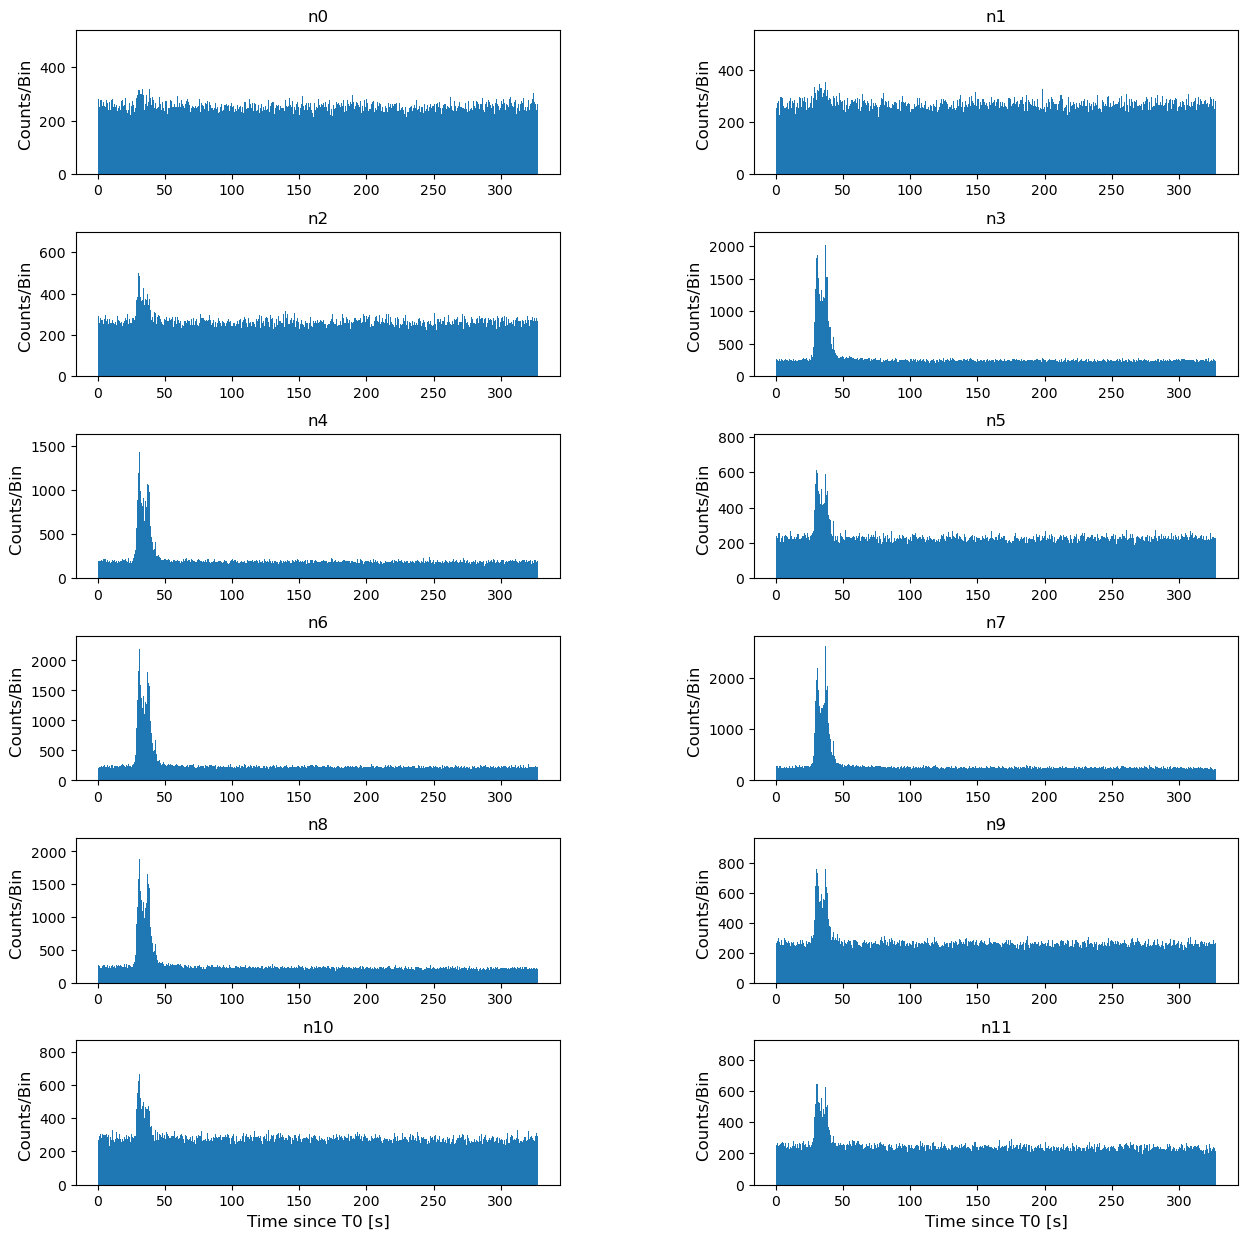

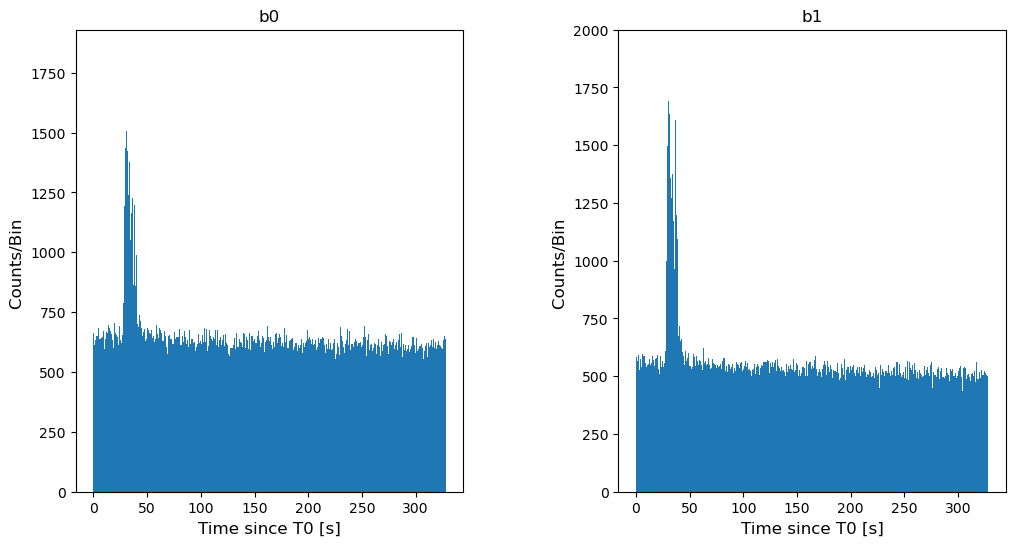

In [6]:
analize=GRBAnalysis('GRB090926A',275631628.987,TTE_dir)
analize.light_curve_analysis(window_beginning=200,window_ending=300,trigNaI=[3,7],acceptance=3)

## Cumulative light curve and T90

bg 4067.578603 \pm 70.197657


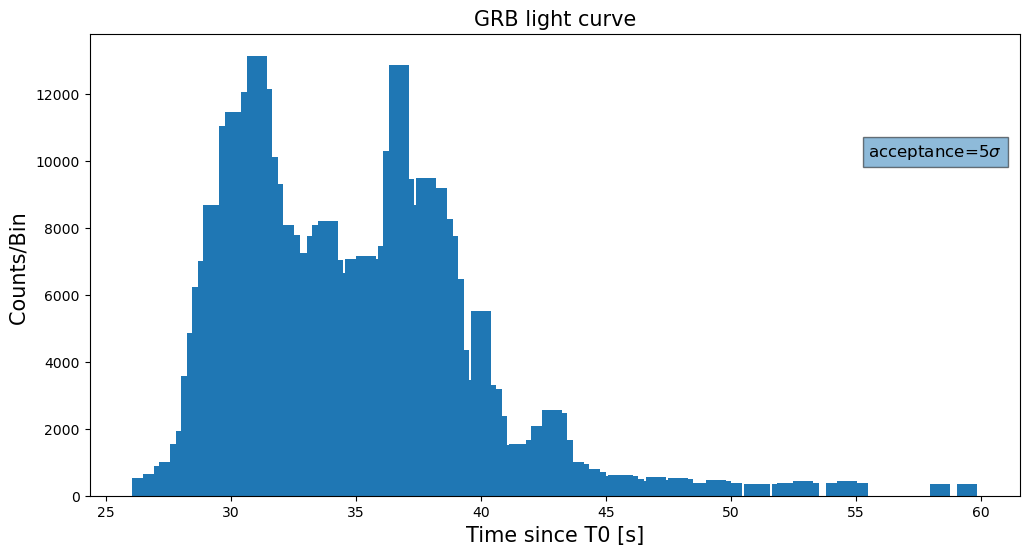

In [7]:
#We have seen that the cumulative light curve above 3 sigma takes into account photons that can not be entirely attributed to the GRB peak, so 
#we decided to use as acceptance rate 5 sigma
analize.cumulative_light_curve(window_beginning=200,window_ending=300)

T90 can be computes as the time interval, between 5$\%$ of the total number of photons and the 95$\%$ (above noise which is absent in our plot)

T90=13.760+-0.286, T90_start (from the trigger) =2.176 as of catalogue

We do our calculation of the uncertainty of the T90, ONLY based by time resolution of our histogram. But other methods are presented.

Total counts above background = 479611.88
Five percent of counts = 23980.59
Ninety five percent of counts = 455631.29
Time resolution=0.20
Start time from trigger= 2.152260
T90 is 13.99 +/- 0.28 s
Long GRB!
---------------------------------------------
With maximum error taken into account
error t90= 0.30
With poissonian error taken into account
error t90 = 0.28


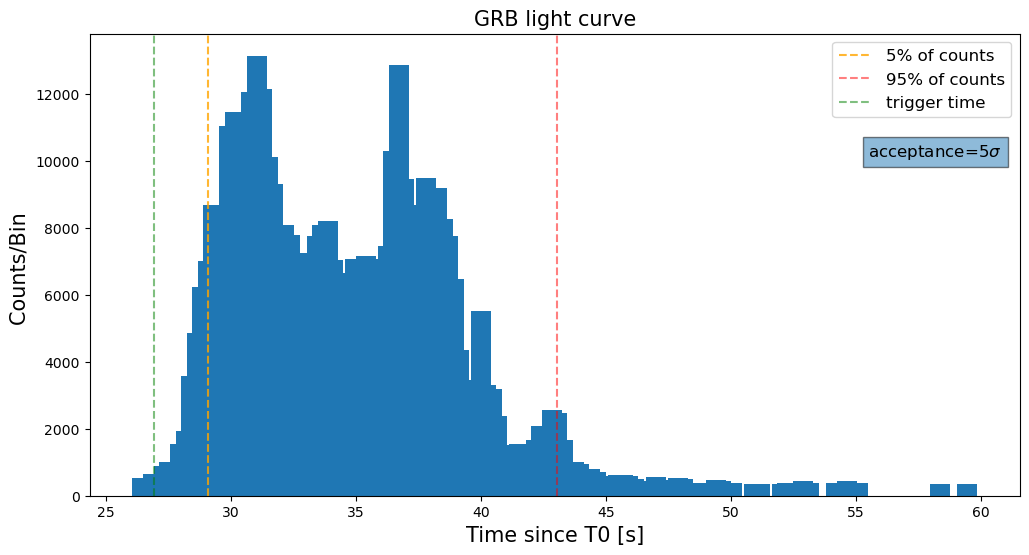

In [8]:
analize.calculate_T90()

## Light curves for different energy bands

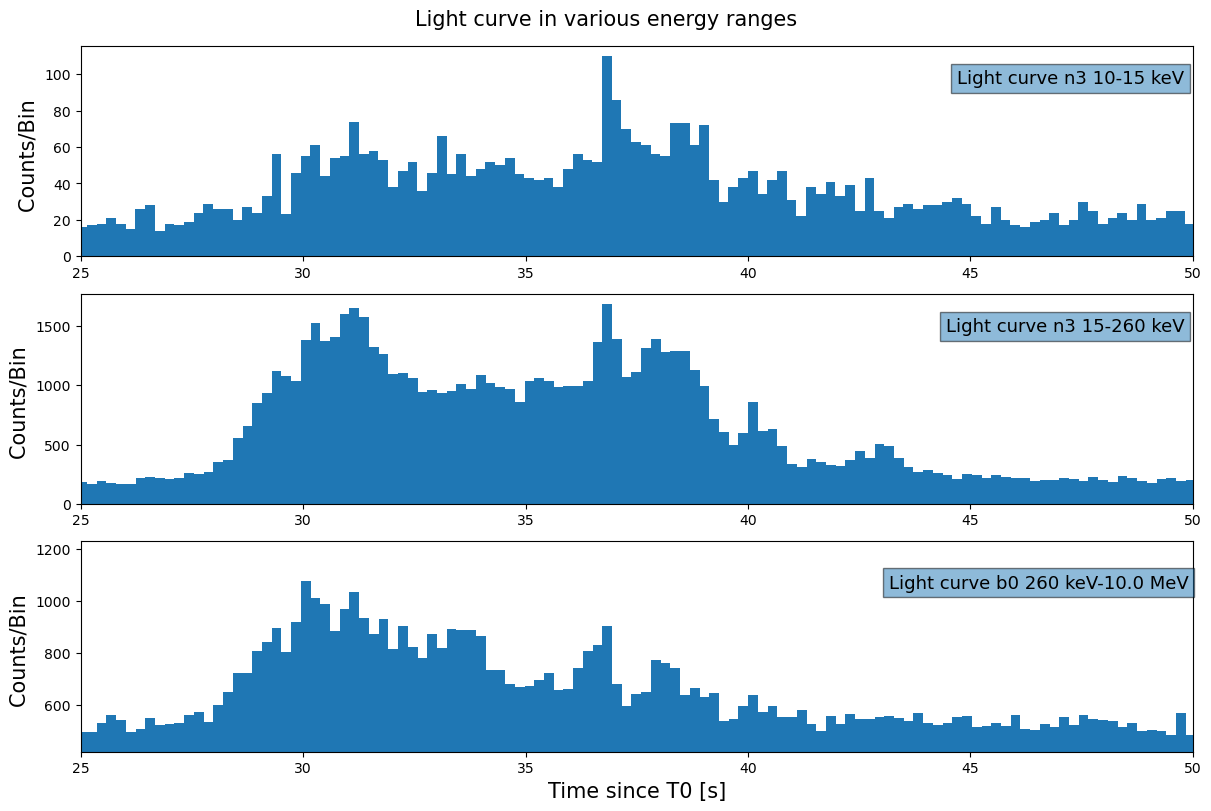

In [9]:
analize.light_curve_energy_analysis(10,15,260,10000,[25,50])

## Light curve peaks

We used this to create the txt files for the pha files for spectral analysis

Times of selected peaks [30.05763933 31.1506444  35.52266467 36.83427075 37.92727581 40.11328595]


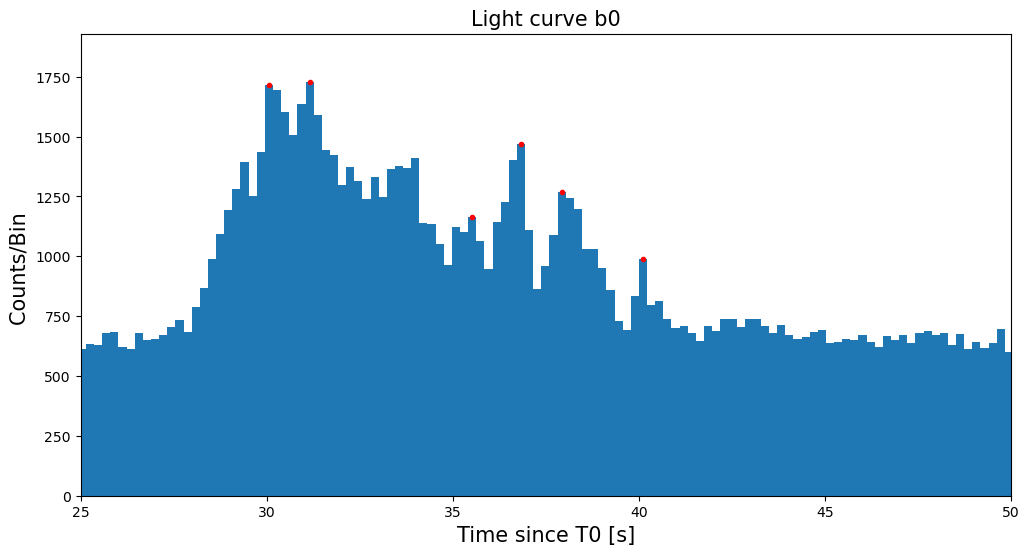

In [10]:
analize.lc_peaks('glg_tte_b0_bn090926181_v00.fit',[25,50])

Times of selected peaks [31.15063053 36.83425434 37.92725892 40.11326808]


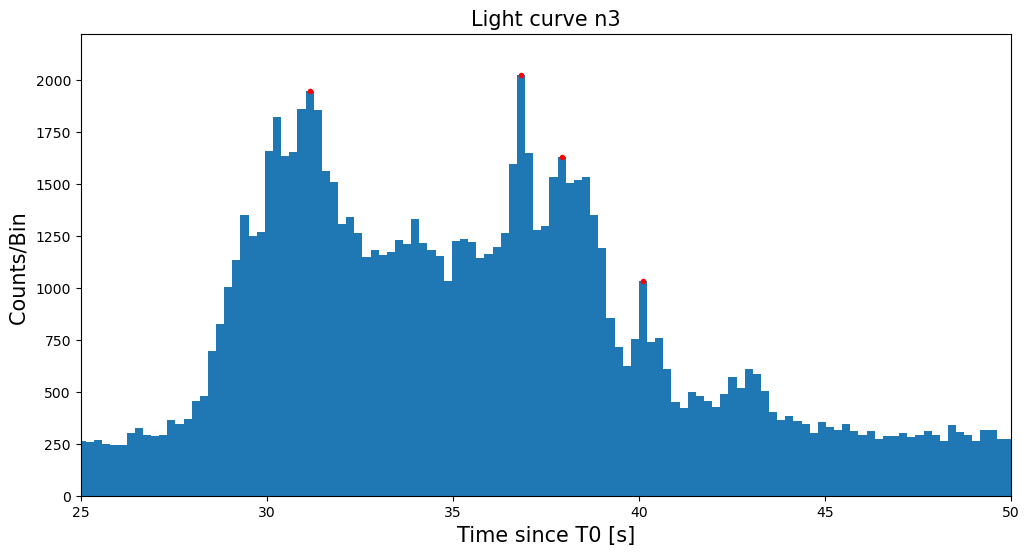

In [11]:
analize.lc_peaks('glg_tte_n3_bn090926181_v00.fit',[25,50])

## Isotropic energy

In [12]:
from scipy import integrate as I

In [43]:
def bolometric_fluence(data_values):
    """Definition of the characterizing constants"""
    a = data_values[0] #first photon index of the Band function
    b = data_values[1] #second photon index of the Band function
    g = data_values[2] #photon index of the power law
    E_p = data_values[3] #peak energy of the photon distribution
    K_b = data_values[4] #multiplicative constant of the Band function
    K_pl = data_values[5] #multiplicative constant of the power law
    """Definition of the extremes of integration"""
    z = 2.11 #redshift
    E_i = 1/(1+z) #keV, initial energy rescaled by the redshift
    Eb_c = (a - b)*E_p/(1+z) #keV, characteristic energy of the Band function, divides the two branches, this too needs to be rescaled by the redshift
    E_f = 10000/(1+z) #keV, final energy, set by default to 10 MeV, rescaled by the redshift

    """Definition of the two branches of the function"""
    def inferior_band_plus_pl(E):
        return E*(K_b*((E/100)**a)*np.exp(-(E/E_p)) )
    I_inf, I_inf_err = I.quad(inferior_band_plus_pl, E_i, Eb_c)

    def superior_band_plus_pl(E):
        return E*(((E/100)**b)*((E_p/100*(a-b))**(a-b))*np.exp(b-a) +K_pl*E**(-g))
    I_sup, I_sup_err = I.quad(superior_band_plus_pl, Eb_c, E_f)
    
    Bol_flu = I_inf + I_sup#keV/cm^2, integrated bolometric fluence
    Bol_flu_erg = Bol_flu*(1.6*10**(-9))
    
    D_l = 5.10*10**28 #cm, luminosity distance of the grb

    E_iso = ((4*np.pi)*(D_l**2)*Bol_flu_erg)/(1+z) 
    E_iso_rescaled = E_iso/(10**54)
    
    return(E_iso_rescaled)

In [44]:
#Simple test of integral calculation

a = -0.81 #first photon index of the Band function
b = -9.37 #second photon index of the Band function
g = 1.1 #photon index of the power law
E_p = 280 #peak energy of the photon distribution
K_b = 0.07 #multiplicative constant of the Band function
K_pl = 2 #multiplicative constant of the power law
parameters=np.array([a,b,g,E_p,K_b,K_pl])

E_iso_rescaled=bolometric_fluence(parameters)
print("L'energia isotropica è %f 10^54 erg"  %(E_iso_rescaled))

L'energia isotropica è 0.892889 10^54 erg


We put an arbitrary error on the two parameters that change the most the integral.

Then we perform the same operation, varying this parameters in these same directions. We obtained 

In [45]:
a = -0.81 + 0.03 #first photon index of the Band function
b = -9.37 #second photon index of the Band function
g = 1.1+0.4 #photon index of the power law
E_p = 280 + 27 #peak energy of the photon distribution
K_b = 0.07 #multiplicative constant of the Band function
K_pl = 2 #multiplicative constant of the power law
parameters=np.array([a,b,g,E_p,K_b,K_pl])

E_iso_rescaled_sup=bolometric_fluence(parameters)
print("L'energia isotropica è %f 10^54 erg"  %(E_iso_rescaled_sup))

L'energia isotropica è 1.794640 10^54 erg


In [46]:
a = -0.81 - 0.03 #first photon index of the Band function
b = -9.37 #second photon index of the Band function
g = 1.1-0.4 #photon index of the power law
E_p = 280 - 27 #peak energy of the photon distribution
K_b = 0.07 #multiplicative constant of the Band function
K_pl = 2 #multiplicative constant of the power law
parameters=np.array([a,b,g,E_p,K_b,K_pl])

E_iso_rescaled_inf=bolometric_fluence(parameters)
print("L'energia isotropica è %f 10^54 erg"  %(E_iso_rescaled_inf))

L'energia isotropica è 0.711981 10^54 erg


In [54]:
sup = abs(E_iso_rescaled_sup - E_iso_rescaled)
inf = abs(E_iso_rescaled - E_iso_rescaled_inf)
print("L'energia isotropica è %f 10^54 erg"  %(E_iso_rescaled))
print("superior error %f"  %(sup))
print("inferior error %f"  %(inf))

E_p = 280
z=2.11
E_p_int = (1+z)*E_p
DE = (1+z)*94
print("Energia di picco intrinseca:", E_p_int)
print("con errore:", DE)

L'energia isotropica è 0.892889 10^54 erg
superior error 0.901752
inferior error 0.180908
Energia di picco intrinseca: 870.8
con errore: 292.34
